In [85]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [86]:
df = pd.read_csv('CreditCard.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [87]:
df.isna().mean()

CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.000112
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    0.034972
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

In [88]:
df.shape

(8950, 18)

In [89]:
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors=3,weights='distance')
df[["CREDIT_LIMIT", "MINIMUM_PAYMENTS"]] = knn.fit_transform(df[["CREDIT_LIMIT", "MINIMUM_PAYMENTS"]])

In [90]:
def custom_describe(data):
    """
    Generate a custom description of a DataFrame including basic statistics, 
    missing values count, unique values count, outliers count, and data types.

    Parameters:
    - data (pd.DataFrame): The pandas DataFrame to be described.

    Returns:
    pd.DataFrame: A custom description DataFrame with the following columns:
    - data_type: Data types for each column.
    - mean: Mean value for each numeric column.
    - std: Standard deviation for each numeric column.
    - missing_values: Count of missing values for each column.
    - unique_values: Count of unique values for each column.
    - outliers: Count of outliers for each numeric column.
    """
    # Basic statistics
    desc_stats = data.describe()

    # Missing values count
    missing_values = data.isnull().sum()

    # Unique values count
    unique_values = data.nunique()

    # Identify numeric columns
    numeric_cols = data.select_dtypes(include=['number']).columns

    # Calculate IQR and identify outliers for each numeric column
    outliers = {}
    for col in numeric_cols:
        q1 = desc_stats.loc['25%', col]
        q3 = desc_stats.loc['75%', col]
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers[col] = ((data[col] < lower_bound) | (data[col] > upper_bound)).sum()

    # Get data types for each column
    data_types = data.dtypes
    
    # Combine all information
    custom_description = pd.DataFrame({
        'data_type': data_types,
        'mean': desc_stats.loc['mean'],
        'std': desc_stats.loc['std'],
        'missing_values': missing_values,
        'unique_values': unique_values,
        'outliers': outliers
    })
    return custom_description

In [91]:
custom_describe(df)

,data_type,mean,std,missing_values,unique_values,outliers
BALANCE,float64,1564.474828,2081.531879,0,8871,695.0
BALANCE_FREQUENCY,float64,0.877271,0.236904,0,43,1493.0
CASH_ADVANCE,float64,978.871112,2097.163877,0,4323,1030.0
CASH_ADVANCE_FREQUENCY,float64,0.135144,0.200121,0,54,525.0
CASH_ADVANCE_TRX,int64,3.248827,6.824647,0,65,804.0
CREDIT_LIMIT,float64,4494.336879,3638.627997,0,206,248.0
CUST_ID,object,NaN,NaN,0,8950,NaN
INSTALLMENTS_PURCHASES,float64,411.067645,904.338115,0,4452,867.0
MINIMUM_PAYMENTS,float64,894.927261,2364.008025,0,8689,850.0
ONEOFF_PURCHASES,float64,592.437371,1659.887917,0,4014,1013.0


In [92]:
df.drop(columns=['CUST_ID'], inplace=True)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,722.305479,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


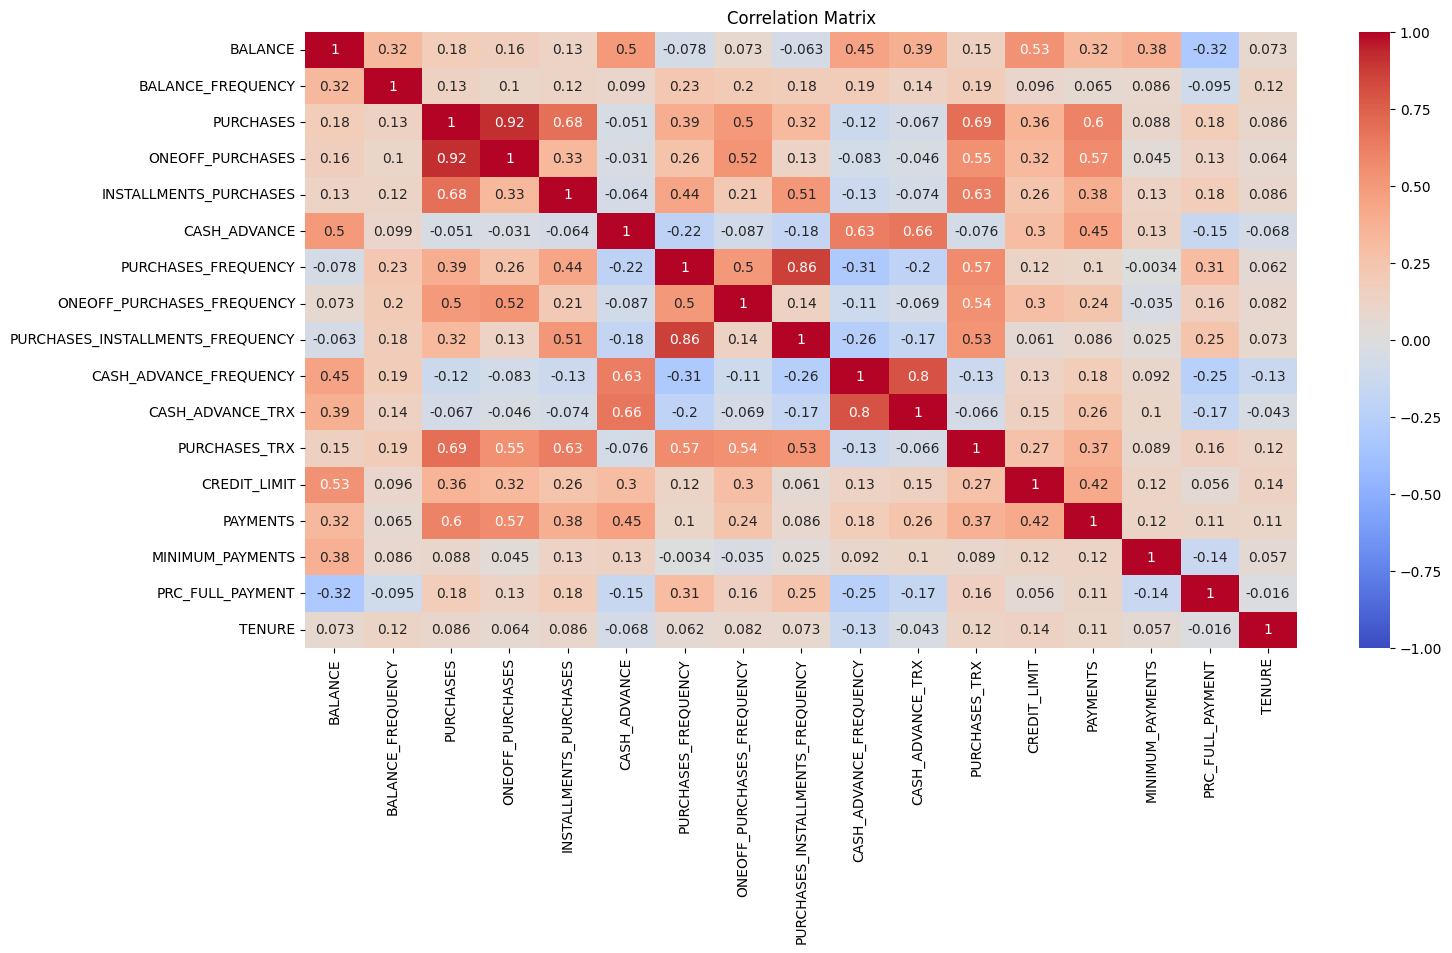

In [93]:
import seaborn as sns
correlation_matrix = df.corr()

# Finding heatmap via correlation matrix
plt.figure(figsize=(16,8))
sns.heatmap(correlation_matrix,  cmap="coolwarm", vmin=-1, vmax=1,annot = True)
plt.title("Correlation Matrix")
plt.show()

In [94]:
columns_to_remove = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) >= 0.79:
            # Add one column from each pair to remove
            columns_to_remove.add(correlation_matrix.columns[j])
print(columns_to_remove)
remCol = list(columns_to_remove)
df.drop(columns = remCol, axis = 1, inplace = True)

{'CASH_ADVANCE_TRX', 'ONEOFF_PURCHASES', 'PURCHASES_INSTALLMENTS_FREQUENCY'}


In [95]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = df
x = sc.fit_transform(x)

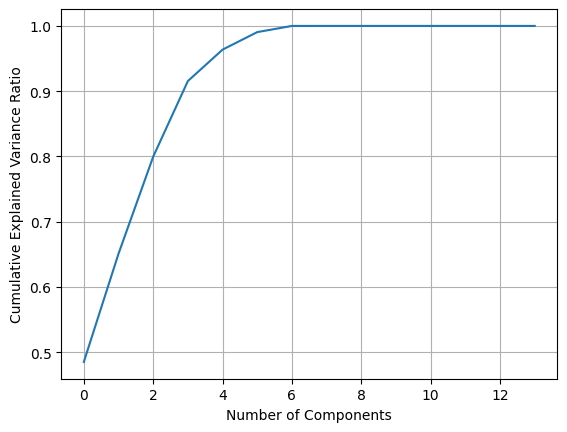

In [96]:

from sklearn.decomposition import PCA
x = df.iloc[:,:]
# Fit PCA
pca = PCA().fit(x)

# Plot cumulative explained variance ratio
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()


In [97]:
pca = PCA(n_components = 6)
#x = pca.fit_transform(x)

In [98]:
x

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,95.40,0.000000,0.166667,0.000000,0.000000,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,6442.945483,0.000000,0.000000,0.250000,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,0.00,0.000000,1.000000,1.000000,0.000000,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,0.00,205.788017,0.083333,0.083333,0.083333,1,7500.0,0.000000,722.305479,0.000000,12
4,817.714335,1.000000,16.00,0.00,0.000000,0.083333,0.083333,0.000000,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,291.12,0.000000,1.000000,0.000000,0.000000,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,300.00,0.000000,1.000000,0.000000,0.000000,6,1000.0,275.861322,1212.904787,0.000000,6
8947,23.398673,0.833333,144.40,144.40,0.000000,0.833333,0.000000,0.000000,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,36.558778,0.000000,0.000000,0.166667,0,500.0,52.549959,55.755628,0.250000,6


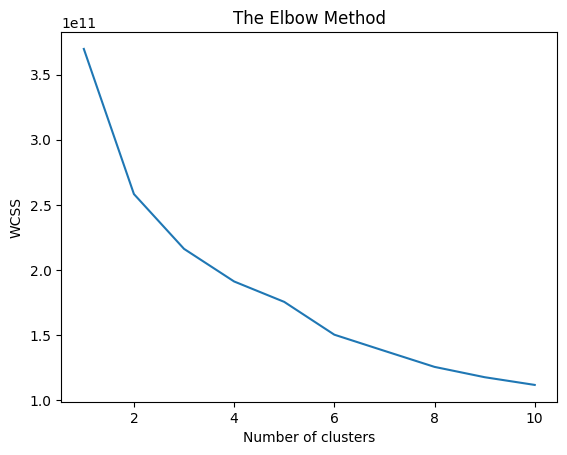

In [99]:
from sklearn.cluster import KMeans
wcss = list()
# In this we will making a curve to find with different number of cluster
for i in range(1,11):
    K_means = KMeans(n_clusters=i, init='k-means++', random_state=42)
    K_means.fit(x)
    wcss.append(K_means.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [100]:
from kneed import KneeLocator
k1=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
elPoint = k1.elbow
elPoint

3

In [101]:
## So making K_Means cluster for 3
finalKmeans = KMeans(n_clusters= elPoint, init='k-means++',random_state=42)
y_kmeans = finalKmeans.fit_predict(x)

In [102]:
cluster_labels = finalKmeans.labels_
cluster_labels

array([1, 0, 0, ..., 1, 1, 1])

In [103]:
df['Cluster'] = pd.DataFrame(y_kmeans)

In [104]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,95.4,0.000000,0.166667,0.000000,0.000000,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.0,6442.945483,0.000000,0.000000,0.250000,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,0.0,0.000000,1.000000,1.000000,0.000000,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,0.0,205.788017,0.083333,0.083333,0.083333,1,7500.0,0.000000,722.305479,0.000000,12,0
4,817.714335,1.000000,16.00,0.0,0.000000,0.083333,0.083333,0.000000,1,1200.0,678.334763,244.791237,0.000000,12,1


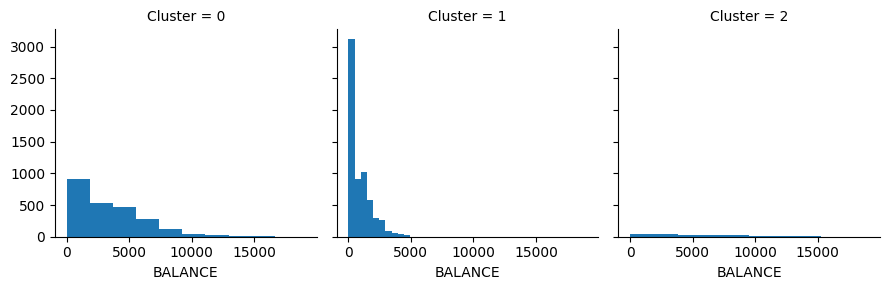

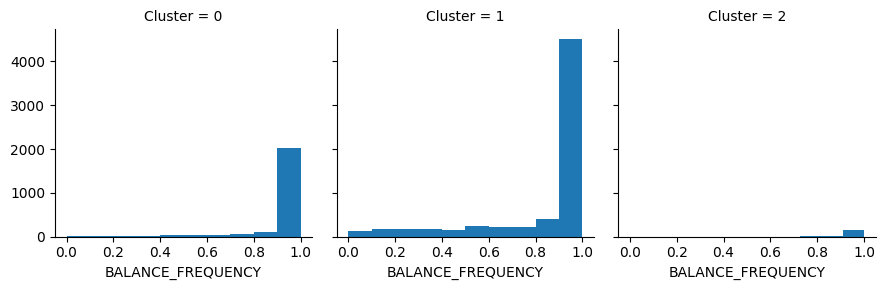

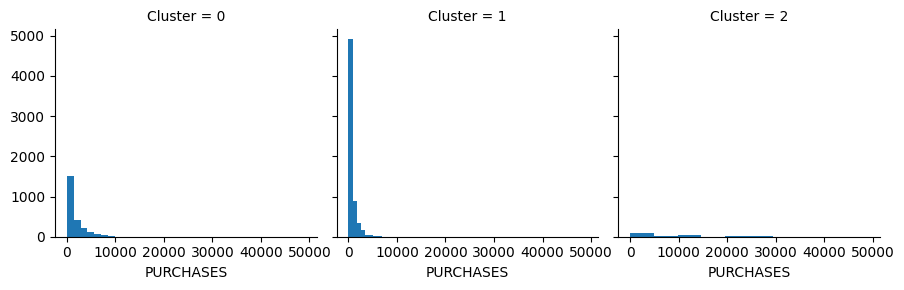

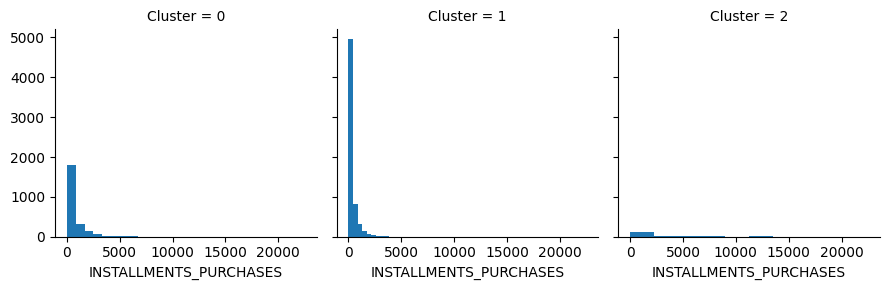

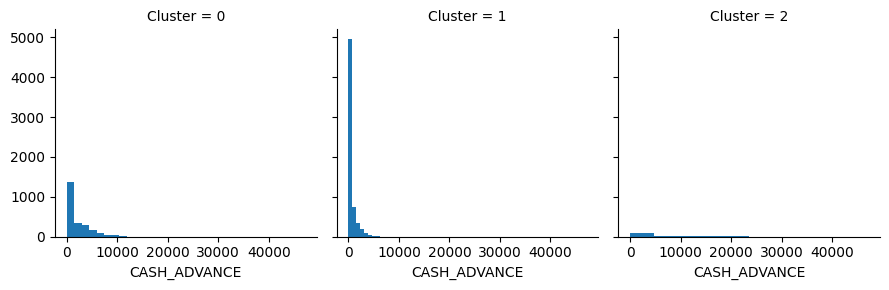

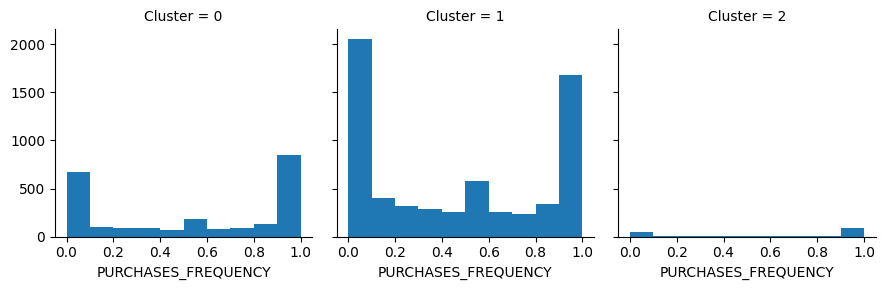

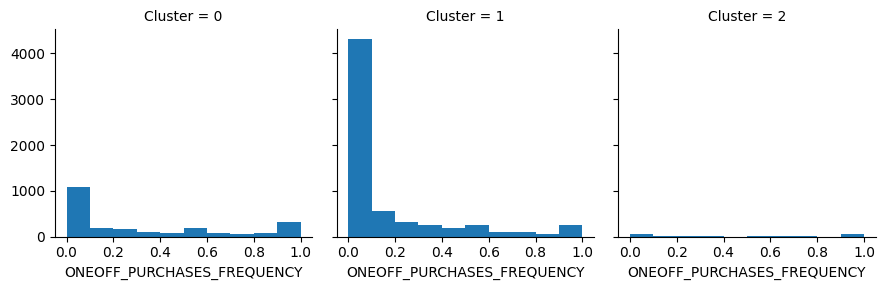

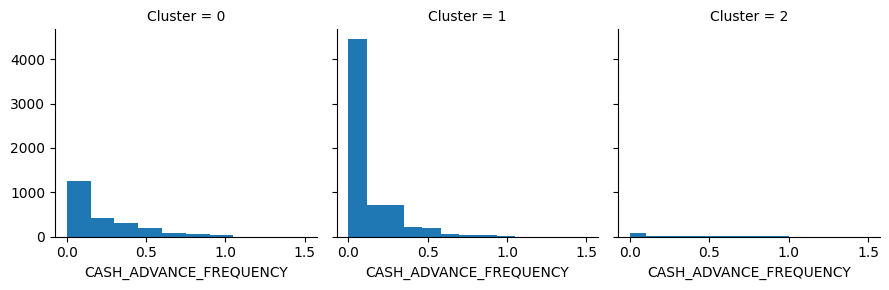

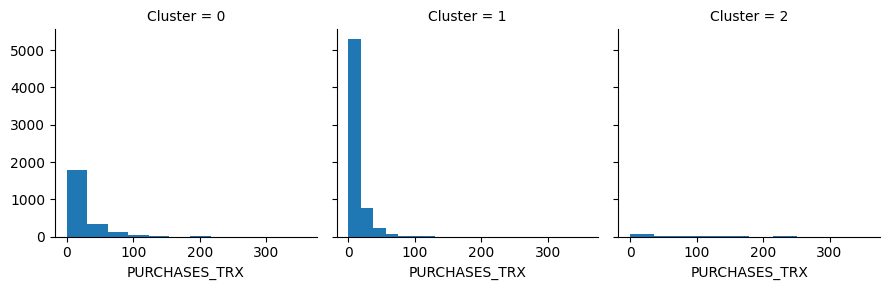

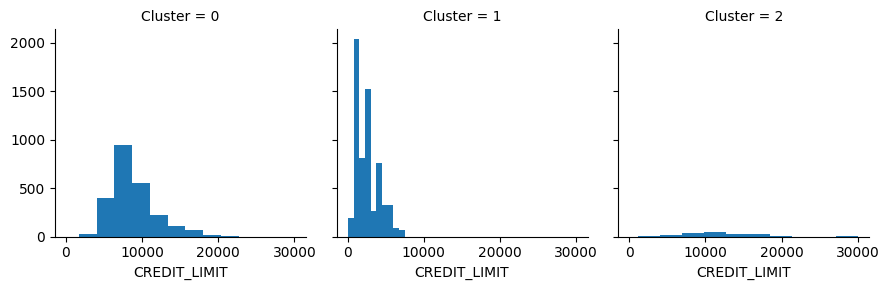

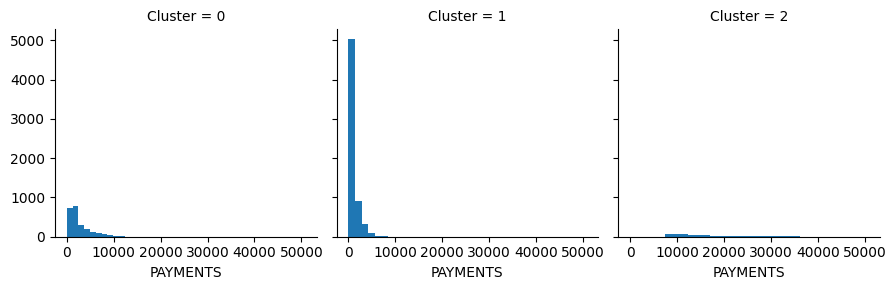

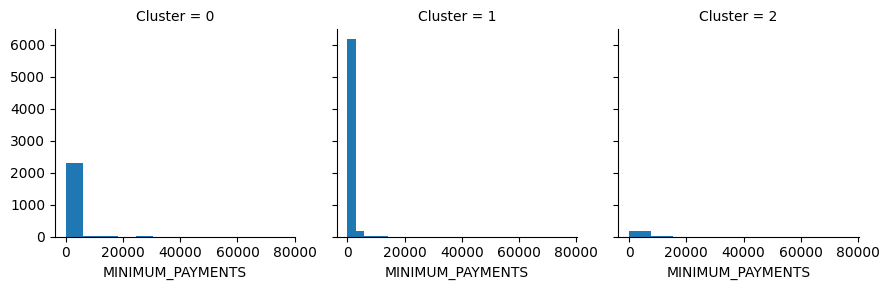

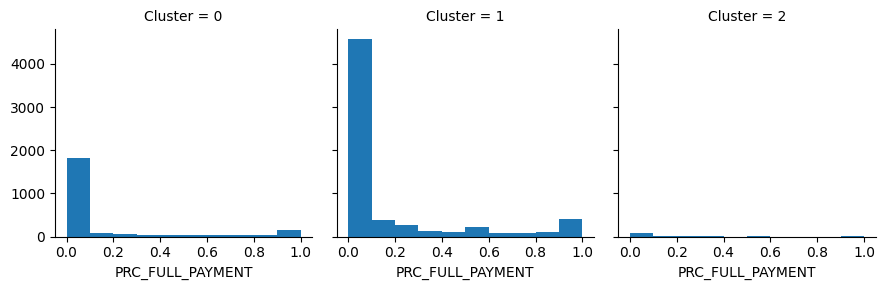

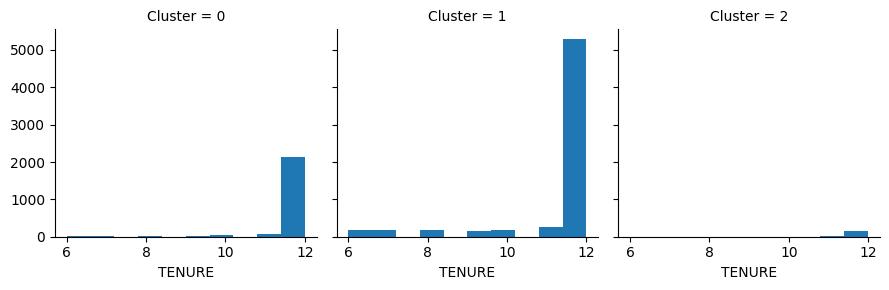

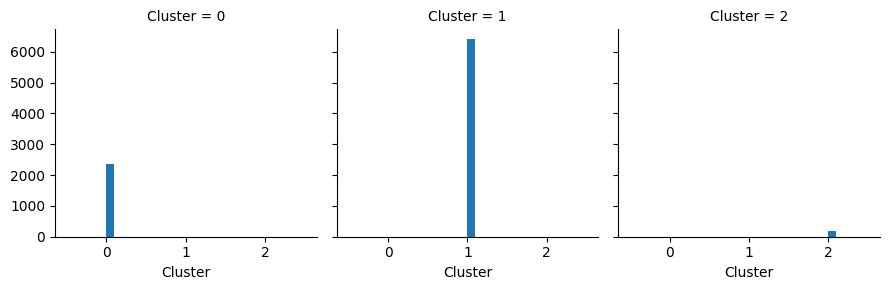

In [105]:
for c in df:
    grid= sns.FacetGrid(df, col='Cluster')
    grid.map(plt.hist, c)

In [106]:
df['Cluster'].value_counts()

Cluster
1    6407
0    2365
2     178
Name: count, dtype: int64

In [107]:
data = (df.groupby('Cluster').mean()).T

In [108]:
data

Cluster,0,1,2
BALANCE,3243.066155,851.817872,4913.489594
BALANCE_FREQUENCY,0.938783,0.853567,0.913172
PURCHASES,1538.825209,608.478076,8094.621404
INSTALLMENTS_PURCHASES,581.176541,289.886827,2512.741573
CASH_ADVANCE,1889.767835,493.932132,6331.305377
PURCHASES_FREQUENCY,0.542119,0.466924,0.645760
ONEOFF_PURCHASES_FREQUENCY,0.313905,0.153823,0.472303
CASH_ADVANCE_FREQUENCY,0.200130,0.106746,0.293908
PURCHASES_TRX,21.872727,10.635555,66.191011
CREDIT_LIMIT,8877.782049,2669.636416,11932.584270


In [109]:
from sklearn.metrics import silhouette_score

best_number_Clusters=None
best_init=None
best_score=-1.0

init=['random','k-means++']
nclusters=range(2,5)
 
for i in init:
    for j in nclusters:
        kmeans=KMeans(n_clusters=j,init=i,random_state=42)
        kmeans.fit(x)

        sil=silhouette_score(x,kmeans.labels_)

        if sil>best_score:

            best_score=sil

            best_init=i

            best_number_Clusters=j
 

In [110]:
print("Best score is ",best_score)
print("Best init is ",best_init)
print("Best number of clusters are ",best_number_Clusters)

Best score is  0.5121243688942311
Best init is  k-means++
Best number of clusters are  2


In [123]:
kmeans2 = KMeans(n_clusters=3, init='k-means++', random_state=0)
kmeans2.fit(x)
sil2 = silhouette_score(x,kmeans2.labels_)
print("The score is ",sil2)

The score is  0.45425353068482205


In [111]:
pca = PCA(n_components = 2)
x_small = pca.fit_transform(x)

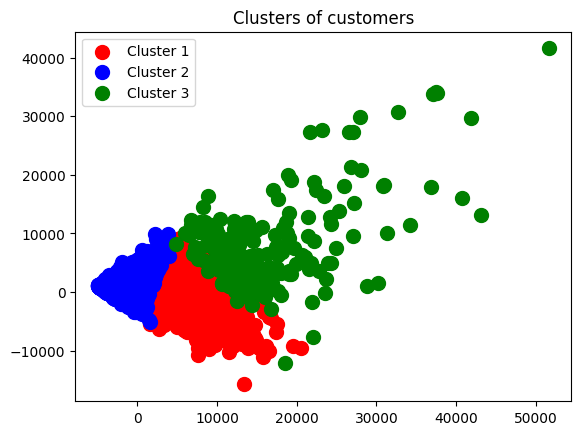

In [112]:
plt.scatter(x_small[y_kmeans == 0, 0], x_small[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x_small[y_kmeans == 1, 0], x_small[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x_small[y_kmeans == 2, 0], x_small[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

#plt.scatter(finalKmeans.cluster_centers_[:, 0], finalKmeans.cluster_centers_[:, 1],finalKmeans.cluster_centers_[:, 2], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.legend()
plt.show()